* 词性标注  
    * 词汇按照他们的词性分类宾浩进行相应放入标注，这个过程我们称之为是词性标注
    * 词性标注需要使用词性标注器(POS Tagger)处理一个词序列病进行词性的标记，返还二元组列表
    * 文本转语音系统常常需要词性标注的辅助
    * 词性标注器还可以对位置的词进行上下文分析来决定他的最有可能的词性是什么

In [1]:
import nltk
# CC - 连接词
# BB - 副词
# IN - 介词
# NN - 名词
# JJ - 形容词
text = nltk.word_tokenize('and now for something completely different')
nltk.pos_tag(text)

[('and', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [7]:
nltk.help.upenn_tagset('RB')    # 查看对应的标记的信息,部分的语料库存在有标记的信息在README文件中可以查阅.readme()

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [9]:
text = nltk.word_tokenize('they refuse to permit us to obtain the refuse permit')
nltk.pos_tag(text)

[('they', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [11]:
# 对于一个词可能有多重的词性，需要在上下文中来进行信息的查阅
# 在该例子中，ski的上下文语义(to, the)决定了他的词性是动词还是名词
text = nltk.word_tokenize('i want to ski on the road')
print(nltk.pos_tag(text))
text = nltk.word_tokenize('i really need the ski')
print(nltk.pos_tag(text))

[('i', 'NN'), ('want', 'VBP'), ('to', 'TO'), ('ski', 'VB'), ('on', 'IN'), ('the', 'DT'), ('road', 'NN')]
[('i', 'NN'), ('really', 'RB'), ('need', 'VB'), ('the', 'DT'), ('ski', 'NN')]


In [12]:
# 我们在第一章中使用过一个函数叫做 .similar()用来查找
# 和制定单词具有相似上下文的单词，这里使用了词性标注的浅层分析
text = nltk.Text([i for i in nltk.corpus.brown.words()])
print(text.similar('woman'))

man time day year car moment world house family child country boy
state job place way war girl work word
None


* 标注语料库
    * 已标注的语料库使用不同的标记集公约来进行标记
    * 构建和表示已知的标识符号
    * NLTK中的大多数的语料已经做了词性标注
        * 我们可以直接使用现有的语料来进行处理,并且NLTK的语料库阅读器对语料标注获取提供统一接口
        * 只要NLTK的语料库存在已标注的文本，必然存在tagged_words()方法获取标注信息
        * 通常不同的标注的方式都不一样，但是NLTK内部存在有统一的标记集，可以添加参数映射到统一的**简化标记集**上
            ```
            nltk.corpus.brown.tagged_tags(tagset='universal')
            ```
    * 标注句子
        * tagged_sents() : 对句子的标注对于某些训练十分有用，用于开发自动标注器

In [15]:
# 自定义标注
tag = nltk.tag.str2tuple('fly/VB')    # 这里的词性二元组是有自己决定的
tag

('fly', 'VB')

In [29]:
# NLTK标注
print(nltk.corpus.brown.tagged_words())
print(nltk.corpus.sinica_treebank.tagged_words())    # 中文
print(nltk.corpus.indian.tagged_words())

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]
[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]
[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]


In [35]:
# NLTK句子标注
# 每一个list中的子list是一个句子，一句子为单位组织
nltk.corpus.brown.tagged_sents()

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

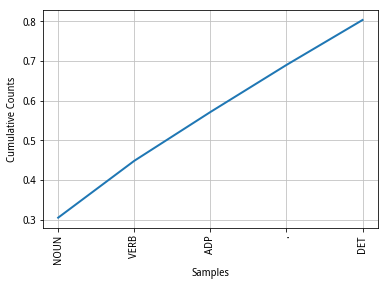

In [50]:
# 查看在brwon语料库中最常见的词性是什么
%matplotlib inline
from nltk.corpus import brown
brown_tag = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist([j for i, j in brown_tag])
sump = tag_fd.N()
for i in tag_fd:
    tag_fd[i] = tag_fd[i] * 1.0 / sump
tag_fd.plot(5, cumulative=True)

* 语料库的标记集(简化标记集)
    * 简化标记集   
    * 可视化学习
        ```
        nltk.app.concordance()    # 打开可视化学习窗口
        ```
    * 名词  
        N 是普通名词，NP 是专有名词
        * 动词的主语 : read
        * 动词的宾语 : bit
        * 形容词后 : beautiful
        * 限定词后 : the
    * NUM  
        NUM 数次 / 数字形容词
    * 动词
        * 动词的上下文中经常包含名词短语来指示物物关系
    * 形容词和副词
        * 形容词可以修饰名词，也可以作为谓语
        * 形容词可以使动词的扩展
        * 副词修饰动词
        * 副词也可以修饰形容词

## 简化标记集
标记 | 含义 | 英文示例  
--- | --- | ---
ADJ	| 形容词 | new, good, high, special, big, local  
ADP	| 介词 | on, of, at, with, by, into, under  
ADV | 副词 | really, already, still, early, now  
CONJ | 连词 | and, or, but, if, while, although  
DET | 限定词，冠词 | the, a, some, most, every, no, which  
NOUN | 名词 | year, home, costs, time, Africa
NUM | 数词 | twenty-four, fourth, 1991, 14:24  
PRT | 小品词 | at, on, out, over per, that, up, with  
PRON | 代词 | he, their, her, its, my, I, us  
VERB | 动词 | is, say, told, given, playing, would  
. | 标点符号 | . , ; !  
X | 其它 | ersatz, esprit, dunno, gr8, univeristy  

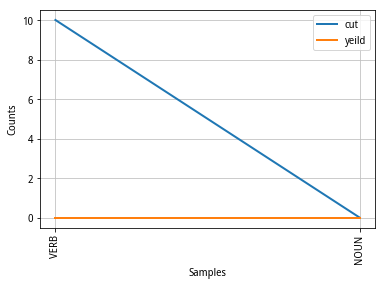

In [78]:
# 对brown语料库中的新闻查看最长出现的动词是什么
# 使用条件概率分布
wsj = nltk.corpus.brown.tagged_words(categories='adventure', tagset='universal')
cfd = nltk.ConditionalFreqDist(wsj)    # 建立条件概率分布，条件是动词，标记是事件
cfd.plot(conditions=['cut', 'yeild'], samples=['VERB', 'NOUN'])

* 没有简化的标记  
    并不是所有的语料库中都使用简化标记集来进行词性标注，相反的，很多的语料库使用独有的标记集来进行词性标注

In [86]:
def findtag(tag_prefix, tagged_text):
    # 创建条件概率分布，返回每个词性的前5个出现频率最高的词
    t = [(j, i) for i, j in tagged_text if j.startswith(tag_prefix)]
    cfd = nltk.ConditionalFreqDist(t)
    return [(tag, list(cfd[tag].keys())[:5]) for tag in cfd.conditions()]

tag_tuple = nltk.corpus.brown.tagged_words(categories='news')    # 使用brown语料库独有的标记集来进行词性标注
p = findtag('NN', tag_tuple)    # 查找名词词性的各种词性标记集中的出现频率最高的单词
p

[('NN-TL', ['County', 'Jury', 'City', 'Committee', 'Court']),
 ('NN', ['investigation', 'primary', 'election', 'evidence', 'place']),
 ('NNS', ['irregularities', 'presentments', 'thanks', 'reports', 'voters']),
 ('NN-HL', ['Merger', 'jail', 'Construction', 'fund', 'sp.']),
 ('NN$-TL',
  ["Department's", "Commissioner's", "President's", "Party's", "Mayor's"]),
 ('NN$', ["ordinary's", "court's", "mayor's", "wife's", "governor's"]),
 ('NNS-HL', ['Wards', 'deputies', 'bonds', 'aspects', 'Decisions']),
 ('NNS-TL', ['Police', 'Roads', 'Legislatures', 'Bankers', 'Reps.']),
 ('NNS$', ["taxpayers'", "children's", "members'", "women's", "years'"]),
 ('NNS$-TL', ["States'", "Women's", "Princes'", "Bombers'", "Falcons'"]),
 ('NN-TL-HL', ['Mayor', 'Commissioner', 'City', 'Oak', 'Grove']),
 ('NNS-TL-HL', ['Nations']),
 ('NN$-HL', ["Golf's", "Navy's"]),
 ('NNS$-HL', ["Dealers'", "Idols'"]),
 ('NN-NC', ['ova', 'eva', 'aya'])]

* 默认标注  
    手动构建的，辅助我们进行新词的词性标注的自定义工具  
    **对句子而言，考虑上下文,NLTK的标注器被设计用于句子链表而不是词链表(每一个句子链表包含若干个词链表)，因为NLTK标注器不应该考虑跨越句子边界的上下文**
    * 默认标注器  
        * 在没有任何以来的情况下，我们可以想到的最简单的词性标注方法就是将所有的次标注成整个语料库中出现频次最多的词性
        * 默认标注器在我们处理大多数的次都是新词的时候，对提高语言处理系统的稳定性有帮助，但是默认标注器的准确率应该进行提高
    * 正则表达式标注器
        * 正则表达式对有词缀的处理更加的灵活和自然
        * 正则表达式标注器是存在匹配顺序的，第一个匹配上的标记会被使用
        * 相对于前面的默认标注器来说，准确度会有所提升
    * 查询标注器  
        * 尽量结合正则表达式标注器和默认标注器，找到出现最频繁的前几个词，存储最有可能的标记，构建查找标注器模型
        * 在查询词典中的单词可以正确的分配最有可能的出现的词性，但是不在词典中的单词全部都是分配的None
        * 查询字典的规模越大我们的准确度就越高，但是准确度增长的加速度会降低
        * 回退 :
            * 在查询词典中的我们分配对应的最大频率词性
            * 不在词典中的我们使用默认的词性标注(加入默认标注器)
    * 需要注意
        * 不要忽视任何一个简单的误差，68%和68.1%的差距不是一点点，任何一个细微误差在之后的处理中都会被无限放大
        * 通常将创建的词性标注器和**黄金标准标注库(手动标注的一个被接受的语料库)**作比较
        * .tagged_words ... : 方法获取可以理解是nltk语料库中的黄金标准标注库

In [95]:
from nltk.corpus import brown
# 默认标注器
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
tags = [tag for word, tag in brown.tagged_words(categories='news')]
print(nltk.FreqDist(tags).max())    # 出现频次最高的词性是普通名词

text = 'i do not like green eggs and ham, i do not like them sam i am'
tokens = nltk.word_tokenize(text)
default_tagger = nltk.DefaultTagger('NN')
p = default_tagger.tag(tokens)    # 返还一个全部此行标记都是默认标记的一个标注组
print(p)

# 计算默认标记的成功率，参数是一个标记过的二元元组列表
default_tagger.evaluate(brown_tagged_sents)

NN
[('i', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('i', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('sam', 'NN'), ('i', 'NN'), ('am', 'NN')]


0.13089484257215028

In [101]:
# 正则表达式的标注器
pattern = [
    ('.*ing$', 'VBG'),
    ('.*ed$', 'VBD'),
    ('.*es$', 'VBZ'),
    ('.*ould$', 'MD'),
    ('.*\'s$', 'NN$'),
    ('.*s$', 'NNS'),
    ('^-?[0-9]+(.[0-9]+)?$', 'CD'),
    ('.*', 'NN')    # 类似于默认标注器
]
regex = nltk.RegexpTagger(pattern)    # 构建正则表达式标注器
p = regex.tag(brown_sents[3])
regex.evaluate(brown_tagged_sents)    # 正确率评估

0.20326391789486245

In [117]:
# 查找标注器
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))    # 条件是单词，事件是词性
most_freq_words = list(fd.keys())[:2000]    # 前100个最频繁出现的单词
# 键是单词，值是单词对应的词性
likely_tag = dict([(word, cfd[word].max()) for word in most_freq_words])    # 字典收集前100个频次最高的单词的对应的最有可能的词性
baseline_tagger = nltk.UnigramTagger(model=likely_tag)    #　构建查询标注器
print(baseline_tagger.tag(tokens))
print(baseline_tagger.evaluate(brown_tagged_sents))

# 使用默认的标注进行查询词典之外的标注,标注正确率效果上升
baseline_tagger = nltk.UnigramTagger(model=likely_tag, backoff=nltk.DefaultTagger('NN'))
print(baseline_tagger.tag(tokens))
print(baseline_tagger.evaluate(brown_tagged_sents))

# 检验新的０．７１１４５正确率的词性标注器(默认)在别的语料库中的正确率
test_tagged_sents = nltk.corpus.brown.tagged_sents(categories='adventure')
baseline_tagger.evaluate(test_tagged_sents)    # 效果下降但是还是相对来说不错的

[('i', None), ('do', 'DO'), ('not', '*'), ('like', 'CS'), ('green', None), ('eggs', None), ('and', 'CC'), ('ham', None), (',', ','), ('i', None), ('do', 'DO'), ('not', '*'), ('like', 'CS'), ('them', 'PPO'), ('sam', None), ('i', None), ('am', None)]
0.6356584521749508
[('i', 'NN'), ('do', 'DO'), ('not', '*'), ('like', 'CS'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'CC'), ('ham', 'NN'), (',', ','), ('i', 'NN'), ('do', 'DO'), ('not', '*'), ('like', 'CS'), ('them', 'PPO'), ('sam', 'NN'), ('i', 'NN'), ('am', 'NN')]
0.7114585198003063


0.6875775143491679

* N-grams标注  
    * 一元标注器（不仅仅是1-grams内部使用了不同的统计算法保证泛化误差） 
        * 利用统计算法对每一个**标识符(这里强调是标识符是因为之后我们会用该标准器训练成分块器，那时候的标识符就不是词的概念而是标注了)**进行最有可能的标记,和查找标注器使用功能相同的方法，但是对一元标注器引入黄金标准进行**训练**，训练设计每一个出现的单词，将最有可能的标记存储在内部的训练的字典中
        * 使用功能内置的统计训练算法，更加快速方便的构建一个正确率较高的词性标注器(虽说不能保证100%但是返还误差相对来说保证的很好)
    * 训练和测试数据(机器学习的处理方法)
        * 90%用来训练，10%用来测试,全用来做训练容易过拟合
    * n-grams标注器
        * 一元标注器只考虑词的查询标注，对上下文没有要求
        * n-grams是对一元标注器的一般化，考虑了当前次和前n-1个词的上下文关系，对标注的结果相对来说更好，调训处在给定的上下文中最有可能的词性标注
        * NgramTagger类可以制定具体的n值制作不同的n-grams词性标注器
        * n-grams的特殊情况 : bigram标注器，泛化误差非常大
    * n-grams引出的问题
        * 术语引入
            * 精确率:
                预测为正的样本有多少是正样本,衡量了一个分类算法的精确度
            * 召回率:
                样本中有多少的正样本被预测正确,衡量了一个分类算法的覆盖范围
        * 我们必须要在精确率和召回率之间找到一个合适的权衡
        * n-grams的泛化误差比较高
        * 跨句子边界标注
            n-grams标注的时候采用最近的标记作为当前词的标记的知道，但是一个句子开头的几个单词使用上一个句子的后几个词和标点符号作为指导是不现实的，应对这种困难的方法就是使用.sents
    * 组合标注器
        解决精度和覆盖范围之间的一个最好的办法就是使用更加精确的算法，组合之前的几个标注器可以达到很好的效果
        * 回退标注器
            对于当前标注器无法解决的标注问题采用其他的合适的标注器解决，这个其他的标注器叫做回退标注器

In [128]:
# 训练,只能引入句子的训练
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(train=brown_tagged_sents)
print(unigram_tagger.tag(brown_sents[2007]))    # 对2007号句子检验训练结果
print(unigram_tagger.evaluate(brown_tagged_sents))    # 训练的正确率相比来说提高
# 检验泛化误差，和In[117]的泛化误差作对比
brown_tagged_sents = brown.tagged_sents(categories='adventure')
print(unigram_tagger.evaluate(brown_tagged_sents))    # 繁华误差相对降低，正确率下降不是很厉害

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'QL'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]
0.9349006503968017
0.7890456000692221


In [142]:
# bigram标注器,可以对训练的标注的很好但是泛化误差非常大
bigram_tagger = nltk.BigramTagger(train=brown_tagged_sents, cutoff=2)   # cutoff将只出现1-2次的训练信息忽略考虑使用backoff回退标注器
print(bigram_tagger.evaluate(brown_tagged_sents))
print(bigram_tagger.evaluate(nltk.corpus.brown.tagged_sents(categories='news')))

0.17435320584926883
0.04974441593571613


In [4]:
# n-grams标注器(n = 3)
brown_tagged_sents = nltk.corpus.brown.tagged_sents(categories='news')
grams_5 = nltk.NgramTagger(5, train=brown_tagged_sents)
print(grams_5.evaluate(brown_tagged_sents))
print(grams_5.evaluate(nltk.corpus.brown.tagged_sents(categories='adventure')))

0.9372675378403644
0.08541720746445156


In [146]:
# 组合标注器
# 组合标注器可以做不断的扩展，这是一个提高精确度和召回率的修正的好方法
t0 = nltk.DefaultTagger('NN')    # 默认标注器
t1 = nltk.UnigramTagger(train=brown_tagged_sents, backoff=t0)
t2 = nltk.BigramTagger(train=brown_tagged_sents, backoff=t1)
print(t2.evaluate(brown_tagged_sents))    # 精确度很高
print(t2.evaluate(nltk.corpus.brown.tagged_sents(categories='news')))    # 泛化误差还可以，这需要做取舍

0.973335063886245
0.7341428486186526


* 训练之外的问题
    * 生词
        * 训练之中没有查看到的词，我们只能会退到正则表达式标注器或者默认标注器里，因为生词无法利用上下文
        * 使用限制只有n个最频繁的词的n-grams标注器
    * 标注器的存储
        * 训练大语料库的标注器是非常耗时的操作，我们可以将训练好的标注器进行本地序列化存储，以便之后使用
        * pickle推荐
    * 性能上限
        * 混淆矩阵分析  
            对训练的表主机和语料库的环境标注集之间做分析判断，以便修改标记集

In [155]:
test_tags = [tag for sent in brown.sents(categories='editorial') for word, tag in unigram_tagger.tag(sent)]
gold_tags = [tag for word, tag in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags[:10], test_tags[:10]))     # 混淆矩阵,5/10的正确率

       |                     V   |
       |     A     J   N N   B   |
       |     P     J   N N   D   |
       |     -     -   - - V - W |
       |   A H A J T N H T B H D |
       | , P L T J L N L L D L T |
-------+-------------------------+
     , |<1>. . . . . . . . . . . |
    AP | .<.>. . . . . . . . . . |
 AP-HL | . 1<.>. . . . . . . . . |
    AT | . . .<1>. . . . . . . . |
    JJ | . . . .<.>. . . . . . . |
 JJ-TL | . . . . .<1>. . . . . . |
    NN | . . . . . .<.>. . . . . |
 NN-HL | . . . . 1 . 1<.>1 . . . |
 NN-TL | . . . . . . . .<1>. . . |
   VBD | . . . . . . . . .<.>. . |
VBD-HL | . . . . . . . . . 1<.>. |
   WDT | . . . . . . . . . . .<1>|
-------+-------------------------+
(row = reference; col = test)



* 基于转换的标注
    * 问题
        * n-grams的模型非常消耗空间，在模型大小和标注器性能之间有时候需要做出平衡
        * n-grams只是用上下文中的词的标注做为唯一的参考信息，者往往不和句子的常理
    * 引入归纳标记法Brill标注
        * 基于转换的学习 : 猜想词的标记然后返回和修复错误
        * 相对于n-grams占用空间小很多
        * 对于结果更好解释，相对于n-grams的大表来说
* 确定一个词的分类
    * 词的形态学 : 后缀
    * 语法 : 语法规则决定词性
    * 新词 : 新词一般只会出现在特定的封闭类中，只有开放类的词性才最有可能添加新词